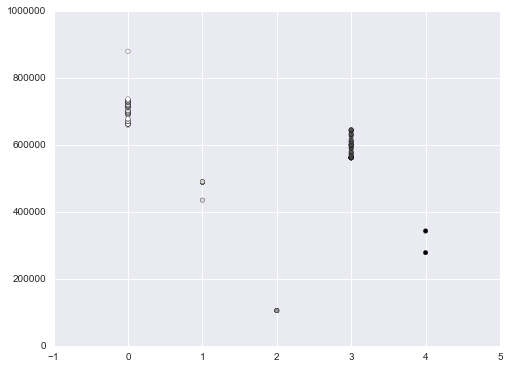

In [127]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
%matplotlib inline

countvec = CountVectorizer()

stop = stopwords.words('english')

#read file
items = pd.read_csv('/users/brianjenney/desktop/datascience/goiitems/items.csv',error_bad_lines=False, encoding='utf-8', engine='c')

#only get columns/rows we need
items = items.ix[1:,2:7]

#rename columns
items.columns=['ItemNum', 'Class', 'SubClass', 'Desc']

#keep array items name to append to wordbag list
descArray = items['Desc']

#strip stop words
items['Desc'].apply(lambda x: [item for item in x if item not in stop])

#strip numbers from desc
items['Desc'] = items['Desc'] .str.replace('\d+', '')

#create data frame with doc matrix
dm = pd.DataFrame(countvec.fit_transform(items['Desc']).toarray(), columns=countvec.get_feature_names())

#match the indexes
dm = dm.reset_index(drop=True)
items = items.reset_index(drop=True)

#concatenate the frames
wordbag = pd.concat([dm, items], axis=1)

#remove the description column and only have numeric data
wordbag = wordbag.iloc[:, :-1]

#create clusters from documents
estimator = KMeans(n_clusters=5)
estimator.fit(wordbag)

#add categories and descriptions to the dataframe
wordbag['Category'] = estimator.labels_

#wordbag = wordbag.sort_values('Category', ascending=False)

# And we'll visualize it:
plt.figure(figsize=(8, 6))
plt.scatter(wordbag['Category'], wordbag['ItemNum'], c=estimator.labels_.astype(float))
plt.show()